# Creating Animations in Jupyter Notebooks

This notebook illustrates how to create animations in Jupyter notebooks using the `matplotlib` animation library.

### Credits:
Some materials developed in this notebook were inspired by https://github.com/jckantor/CBE30338

## Creating animations
In certain situations, animations may be more helpful than sliders in visualizing data. The procedure for creating animations in Jupyter notebook is very similar to creating sliders, as you'll see below.

In [2]:
# Start by importing our libraries, as usual.
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import numpy as np
import control
from IPython.display import display
import warnings
warnings.filterwarnings('ignore') #suppress all warnings

In [27]:
# Define the transfer function
def tf(K_p, tau_I, print_variables=False):
    G   = control.tf([1],[1,1])  # Transfer function for the process
    G_c = K_p*control.tf([tau_I,1],[tau_I*1,0]) # Transfer function for the controller
    sys = G_c*G/(1+G_c*G) # The closed loop transfer function
    if print_variables:
        print('Process TF: ', G)
        print('Controller TF: ', G_c)
        print('Closed-Loop TF: ', sys)
    return sys, T

Process TF:  
  1
-----
s + 1

Controller TF:  
s + 1
-----
  s

Closed-Loop TF:  
    s^3 + 2 s^2 + s
-----------------------
s^4 + 3 s^3 + 3 s^2 + s



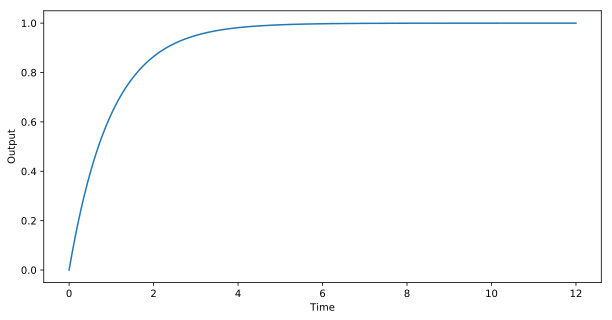

In [28]:
# Define our TF parameters 
K_p = 1
tau_I = 1
T = np.linspace(0,12,1000) # Time scale of the process, we'll use 12 seconds
sys, T = tf(1,1,print_variables=True)

# Generate a step response
t, u = control.step_response(sys,T=T)

# Plot the TF
plt.figure(1, figsize=(10,5))
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,u)
plt.show()

Now we create the subplots. You can adjust the xlim and ylim based on your transfer function.

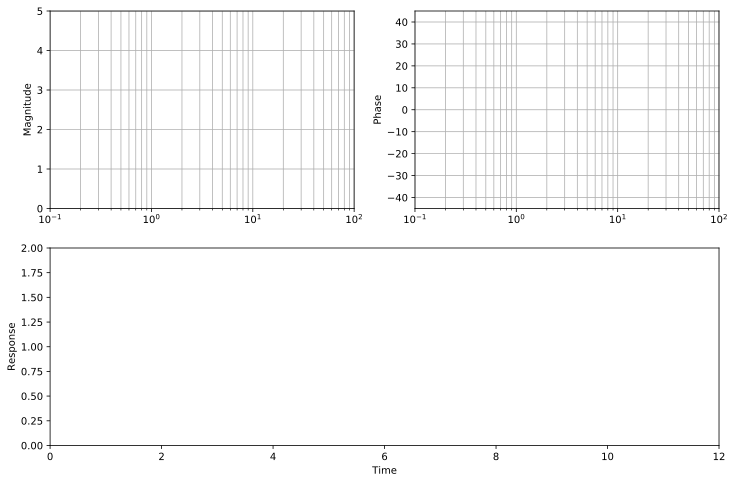

In [29]:
# Create sub plots
gs = gridspec.GridSpec(2, 2)
f = plt.figure(figsize=(12,8));
ax1 = plt.subplot(gs[0, 0]); # row 0, col 0
ax1.grid(True, which='both');
ax2 = plt.subplot(gs[0, 1]); # row 0, col 1
ax2.grid(True, which='both');
ax3 = plt.subplot(gs[1, :]); # row 1, span all columns
line1, = ax1.semilogx([], [], 'b', lw=2);
line2, = ax2.semilogx([], [], 'b', lw=2);
line3, = ax3.plot([], [], 'r', lw=2);
ax1.set_ylim(0,5)
ax1.set_xlim(1e-1,1e2)
ax2.set_ylim(-45,45)
ax2.set_xlim(1e-1,1e2)
ax3.set_ylim(0,2)
ax3.set_xlim(0,12)
ax1.set_ylabel('Magnitude')
ax2.set_ylabel('Phase')
ax3.set_xlabel('Time');
ax3.set_ylabel('Response');

# The animation function. This is called sequentially, frame by frame, to create the animated plot.
def drawframe(n):
    K_p = K_p_arr[n]
    tau_I = tau_I_arr[n]    
    T = np.linspace(0,12,1000)
    sys, T = tf(K_p,tau_I)
    mag, phase, omega = control.bode(sys, Plot=False);
    t, u = control.step_response(sys,T=T)
    line1.set_data(omega, mag)
    line2.set_data(omega, phase)
    line3.set_data(t,u)
    ax3.set_title('Tau = {:.2f}, K = {:.2f}'.format(tau_I,K_p))
    
    # Print out the current frame using "\r", the 'carriage return' character, as our end character.
    # This makes Python print the frame on the same line.
    print("Frame: {:0d}".format(n), end="\r")
    return (line1,line2,line3)

## Explore the effects of K

The `interval` parameter is the delay between frames in milliseconds and it controls the speed of the animation. 

In [30]:
n_frames = 50
K_p_arr = np.linspace(0.1,1.5,n_frames)
tau_I_arr = np.linspace(0.1,0.1,n_frames)

In [31]:
from matplotlib import animation
anim = animation.FuncAnimation(f, drawframe, frames=n_frames, interval=50)
from IPython.display import HTML
HTML(anim.to_jshtml())

## Explore the effects of $\tau_I$

In [32]:
K_p_arr = np.linspace(0.2,0.2,100)
tau_I_arr = np.linspace(0.1,1.5,100)

In [33]:
from matplotlib import animation
anim = animation.FuncAnimation(f, drawframe, frames=100, interval=50)
from IPython.display import HTML
HTML(anim.to_jshtml())